<a href="https://colab.research.google.com/github/theiaa7/PBOjava/blob/main/Apriori_Assoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assosiation Rules
Merupakan salah satu metode machine learning yang digunakan untuk mengidentifikasi hubungan antar variabel dalam kumpulan data yang besar. Secara umum association rule digunakan untuk untuk market basket analysis dengan tujuan marketing.

# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

# Load Data

In [ ]:
df = pd.read_csv('/content/Assignment-1_Data.csv', sep = ';')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
#cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


# Preprocessing Data

In [ ]:
# cek null
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
# cek NA
df[df.isna().any(axis=1)]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,01.12.2010 11:52,0,NaN,United Kingdom
1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,01.12.2010 14:32,"2,51",NaN,United Kingdom
1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,01.12.2010 14:32,"2,51",NaN,United Kingdom
1412,536544,POLKADOT RAIN HAT,4,01.12.2010 14:32,"0,85",NaN,United Kingdom
1413,536544,RAIN PONCHO RETROSPOT,2,01.12.2010 14:32,"1,66",NaN,United Kingdom
...,...,...,...,...,...,...,...
521695,581498,JUMBO BAG RED RETROSPOT,5,09.12.2011 10:26,"4,13",NaN,United Kingdom
521696,581498,JUMBO BAG BAROQUE BLACK WHITE,4,09.12.2011 10:26,"4,13",NaN,United Kingdom
521697,581498,LADIES & GENTLEMEN METAL SIGN,1,09.12.2011 10:26,"4,96",NaN,United Kingdom
521698,581498,S/4 CACTI CANDLES,1,09.12.2011 10:26,"10,79",NaN,United Kingdom


In [ ]:
# # remove missing value
# df1 = df.dropna()
# len(df1) #banyak data setelah remove missing value

In [ ]:
# #cek apakah masih ada na
# df1[df1.isna().any(axis=1)]

In [ ]:
# cek quantity negatif
df1 = df
df1[df1['Quantity']<=0][:10]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,01.12.2010 16:50,0,NaN,United Kingdom
4289,536764,NaN,-38,02.12.2010 14:42,0,NaN,United Kingdom
6998,536996,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
6999,536997,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
7000,536998,NaN,-6,03.12.2010 15:30,0,NaN,United Kingdom
7002,537000,NaN,-22,03.12.2010 15:32,0,NaN,United Kingdom
7003,537001,NaN,-6,03.12.2010 15:33,0,NaN,United Kingdom
7005,537003,NaN,-2,03.12.2010 15:33,0,NaN,United Kingdom
7006,537004,NaN,-30,03.12.2010 15:34,0,NaN,United Kingdom
7007,537005,NaN,-70,03.12.2010 15:35,0,NaN,United Kingdom


In [ ]:
# cek price = 0
from numpy import float64
df1['Price'] = df1['Price'].str.replace(',','.').astype(float64) #mengubah tipe data price dari object ke float64

df1[df1['Price']<=0][:10]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,01.12.2010 11:52,0.0,NaN,United Kingdom
1937,536545,NaN,1,01.12.2010 14:32,0.0,NaN,United Kingdom
1938,536546,NaN,1,01.12.2010 14:33,0.0,NaN,United Kingdom
1939,536547,NaN,1,01.12.2010 14:33,0.0,NaN,United Kingdom
1940,536549,NaN,1,01.12.2010 14:34,0.0,NaN,United Kingdom
1941,536550,NaN,1,01.12.2010 14:34,0.0,NaN,United Kingdom
1977,536552,NaN,1,01.12.2010 14:34,0.0,NaN,United Kingdom
1978,536553,NaN,3,01.12.2010 14:35,0.0,NaN,United Kingdom
1979,536554,NaN,23,01.12.2010 14:35,0.0,NaN,United Kingdom
2359,536589,NaN,-10,01.12.2010 16:50,0.0,NaN,United Kingdom


In [ ]:
# delete price = 0
df1 = df1[df1['Price']>0] #hapus price <= 0
df1[df1['Price']<=0][:10]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


In [ ]:
# droping non product data
df1=df1.loc[(df1['Itemname']!='POSTAGE')&(df1['Itemname']!='DOTCOM POSTAGE')&(df1['Itemname']!='Adjust bad debt')&(df1['Itemname']!='Manual')]

In [ ]:
#cek data null
df1.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    130813
Country            0
dtype: int64

In [ ]:
# add column year & month
df1['Year']=df1['Date'].apply(lambda x:x.split('.')[2])
df1['Year']=df1['Year'].apply(lambda x:x.split(' ')[0])
df1['Month']=df1['Date'].apply(lambda x:x.split('.')[1])
df1.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12


In [ ]:
# add column total price
df1['TotalPrice'] = df1['Quantity']*df1['Price']
df1.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34


In [ ]:
# check total price in each month
df1.groupby(['Year','Month'])['TotalPrice'].sum()

Year  Month
2010  12        778386.780
2011  01        648311.120
      02        490058.230
      03        659979.660
      04        507366.971
      05        721789.800
      06        710158.020
      07        642528.481
      08        701411.420
      09        981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: TotalPrice, dtype: float64

In [ ]:
#delete data 2010
df2 = df1[df1['Year']!= '2010']
df2['Year'].unique()

array(['2011'], dtype=object)

# Exploratory Data Analysis (EDA)

## Sales amount & quantity

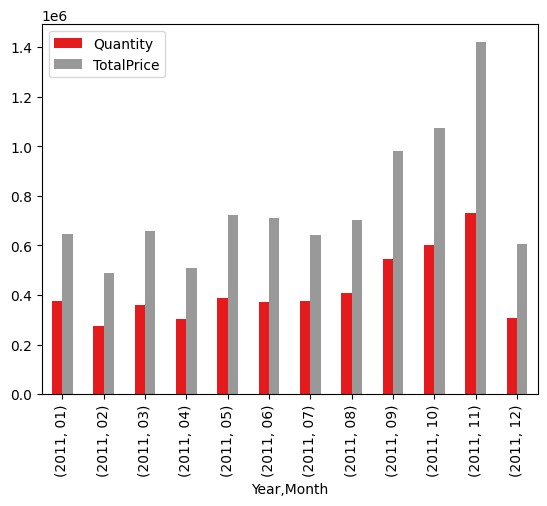

In [ ]:
sales=df2.groupby(['Year','Month'])['TotalPrice','Quantity'].sum()
sales=sales.pivot_table(sales,index=['Year','Month'],aggfunc=np.sum,fill_value=0)
sales.plot(kind='bar',cmap='Set1')
plt.show()

In [ ]:
sales_country=df2.groupby(['Year','Month','Country'])['TotalPrice'].sum().reset_index()
sales_country.to_csv('sales_country.csv')
sales_country=pd.read_csv('sales_country.csv')
fig=px.bar(sales_country,x=['Month'],y='TotalPrice',color='Country',title='Monthly sales amount in each country in 2011')
fig.update_layout(xaxis_title='Month',yaxis_title='Sales amount')
fig.show()

In [ ]:
sales_country.head()

,Year,Month,Country,TotalPrice
0,2011,01,Australia,9017.71
1,2011,01,Belgium,1080.20
2,2011,01,France,16174.12
3,2011,01,Germany,15326.84
4,2011,01,Greece,2661.24


In [ ]:
country=df2.groupby('Country')['TotalPrice'].sum().reset_index()
# country = pd.DataFrame(country)
fig=px.bar(country,x='Country',y='TotalPrice',title='Sales amount in each country in 2021')
fig.update_layout(xaxis={'categoryorder':'total descending'},yaxis_title='Sales amount')
fig.show()

## Category

### Top 10 highest sales amount items

In [ ]:
cm=sns.light_palette("green",as_cmap=True)

item_sales=df2.groupby('Itemname')['Price'].sum().sort_values(ascending=False)[:10].reset_index()
# item_sales.to_csv('item_sales.csv')
# item_sales=pd.read_csv('item_sales.csv')
item_sales.style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Price
0,REGENCY CAKESTAND 3 TIER,24653.67
1,PARTY BUNTING,9416.13
2,SET OF 3 CAKE TINS PANTRY DESIGN,7621.05
3,CREAM SWEETHEART MINI CHEST,6836.38
4,SET/4 WHITE RETRO STORAGE CUBES,6714.75
5,ENAMEL BREAD BIN CREAM,6585.93
6,WHITE HANGING HEART T-LIGHT HOLDER,6563.80
7,DOORMAT KEEP CALM AND COME IN,6385.09
8,SPOTTY BUNTING,6262.40
9,RED RETROSPOT CAKE STAND,6035.29


### Top 10 most purchased items

In [ ]:
df[['Itemname','Quantity']].sort_values(by='Quantity',ascending=False)[:10].style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Quantity
520583,"PAPER CRAFT , LITTLE BIRDIE",80995
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215
483371,ASSTD DESIGN 3D PAPER STICKERS,12540
72509,nan,5568
405138,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198929,SMALL POPCORN HOLDER,4300
213130,?,4000
94245,EMPIRE DESIGN ROSETTE,3906
260928,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
154834,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114


### Top 10 most frequently purchased items

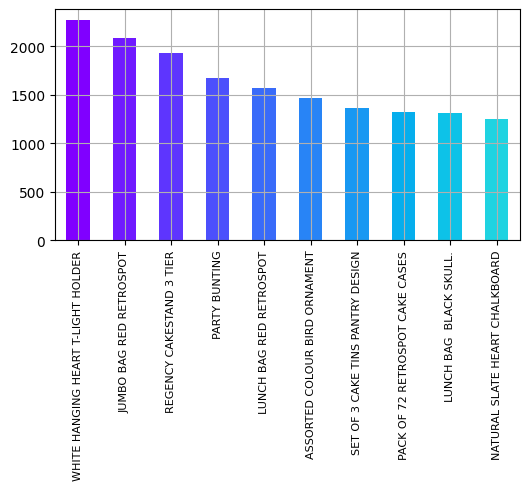

In [ ]:
color=plt.cm.rainbow(np.linspace(0,1,30))
df['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))
# plt.title('Frequency of Most popular items',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

# Analysis

## Apriori Method

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df2['Itemname']=df2['Itemname'].str.strip()
df2['BillNo']=df2['BillNo'].astype('str')

In [ ]:
basket=(df2[df2['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

In [ ]:
basket.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

In [ ]:
basket_sets=basket.applymap(encode_units)

In [ ]:
frequent_itemsets=apriori(basket_sets,min_support=0.03,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.05,0.05,0.03,0.59,12.41,0.03,2.32,0.97
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.05,0.05,0.03,0.64,12.41,0.03,2.64,0.97
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.05,0.05,0.03,0.60,13.23,0.03,2.40,0.98
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.05,0.05,0.03,0.72,13.23,0.03,3.39,0.97
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.82,15.50,0.03,5.25,0.98


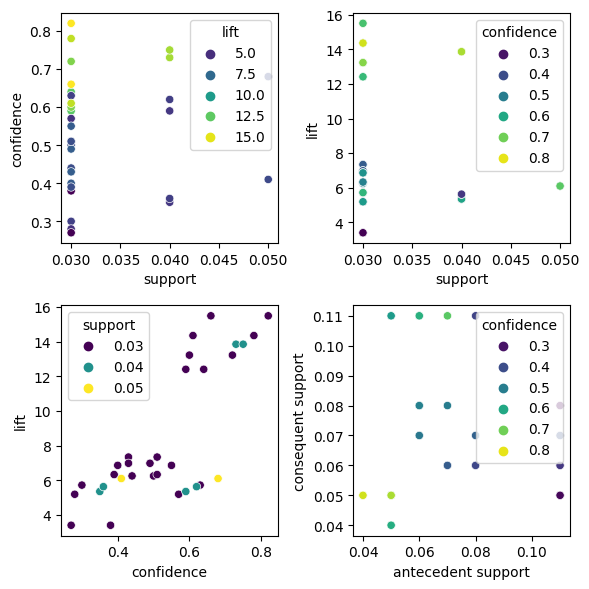

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

## The top 5 of the highest support value of items(antecedents)

Support(item) = Transactions comprising the item / Total transactions

In [ ]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,support
13,frozenset({'JUMBO BAG PINK POLKADOT'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.05
12,frozenset({'JUMBO BAG RED RETROSPOT'}),frozenset({'JUMBO BAG PINK POLKADOT'}),0.05
16,frozenset({'JUMBO STORAGE BAG SUKI'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04
17,frozenset({'JUMBO BAG RED RETROSPOT'}),frozenset({'JUMBO STORAGE BAG SUKI'}),0.04
15,frozenset({'JUMBO SHOPPER VINTAGE RED PAISLEY'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04


## The top 5 of the highest confidence value of items

Confidence = Transactions comprising antecedent and consequent / Transactions comprising antecedent

In [ ]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,confidence
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.82
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.78
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.75
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.73
3,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.72


## The top 5 of the highest lift value of items

Lift = Confidence (antecedent -> consequent) / Support(antecedent)

In [ ]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,lift
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),15.50
5,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),15.50
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),14.36
30,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),14.36
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),13.86


## The best combination of the items¶

In [ ]:
rules[(rules['lift']>=13)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False).style.background_gradient(cmap=cm).set_precision(2)
# rules[(rules['lift']>=6)&(rules['confidence']>=0.5)].sort_values('lift',ascending=False).style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.82,15.50,0.03,5.25,0.98
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.78,14.36,0.03,4.24,0.97
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.73,13.86,0.04,3.55,0.98
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.75,13.86,0.04,3.78,0.98
3,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.05,0.05,0.03,0.72,13.23,0.03,3.39,0.97


# Conclusion

Berdasarkan analysis di atas, dapat disimpulkan sebagai berikut;

*   Item yang paling banyak dibeli adalah **Paper Craft, Little Birdie**
*   Item yang paling sering dibeli adalah **White Hanging Heart T-Light Holder**
*   Kombinasi item terbaik adalah **PINK REGENCY TEACUP AND SAUCER** and **GREEN REGENCY TEACUP AND SAUCER**

